In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [4]:
# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data)

In [5]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
# Determine the number of clusters (K)
# Example: Using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

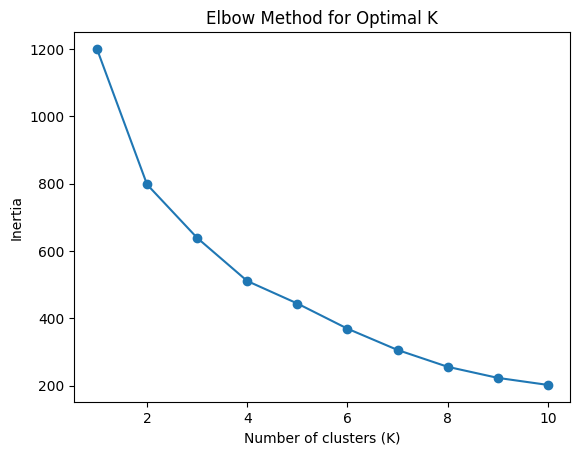

In [7]:
# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
# Based on the elbow curve, select the optimal number of clusters (K)

# Apply K-means clustering
k = 3  # Example: Assume 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

In [9]:
# Reduce dimensionality for visualization (assuming you have more than 2 features)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

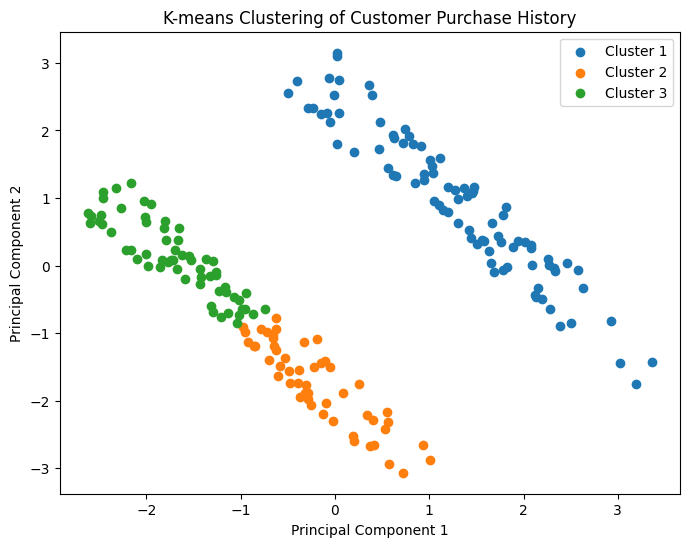

In [10]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Customer Purchase History')
plt.legend()
plt.show()